In [1]:
from Utils_16S_Analysis import *

rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from copy import deepcopy

In [2]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Read_Alignments/'
samples = listdir(filedir+'Alpha_Alleles/paf_files/')

fdir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/16S_Gene_Segments/'
out = {}
for f in ['Synechococcus_Alpha_16SrRNA','Synechococcus_Beta_16SrRNA','Synechococcus_Gamma_16SrRNA']:
    lines = open(fdir+f+'.fna').readlines()
    s = ''
    for l in lines:
        if not l.startswith('>'):
            s += l.replace("\n","")
    out[f.replace("Synechococcus_","").replace("_16SrRNA","")] = s

In [3]:
AP_All_Samples = {}

for s in samples:
    if 'MS50' not in s:
        continue
    Alignment_profile = {'Alpha':{'A':np.zeros(1300),'C':np.zeros(1300),'G':np.zeros(1300),'T':np.zeros(1300)},
                         'Beta':{'A':np.zeros(1300),'C':np.zeros(1300),'G':np.zeros(1300),'T':np.zeros(1300)},
                         'Gamma':{'A':np.zeros(1300),'C':np.zeros(1300),'G':np.zeros(1300),'T':np.zeros(1300)}}
    
    df_alpha = Load_PAF(filedir+'Alpha_Alleles/paf_files/'+s, s)
    df_beta = Load_PAF(filedir+'Beta_Alleles/paf_files/'+s, s)
    df_gamma = Load_PAF(filedir+'Gamma_Alleles/paf_files/'+s, s)
    
    Temp = pd.DataFrame()
    Temp = Temp.append(df_alpha).append(df_beta).append(df_gamma)
    Temp = Temp[Temp['SEnd'] < 1300]
    Temp['Subject'] = Temp['Subject'].str.replace("Synechococcus_","")
    Temp['Subject'] = Temp['Subject'].str.replace("_16SrRNA","")
    Temp['Divergence'] = Temp['MisMatches']/150*100
    Temp = Temp[Temp['Divergence'] < 8]
    
    CS_strings = Temp['CS'].tolist()
    SStarts = Temp['SStart'].tolist()
    SEnds = Temp['SEnd'].tolist()
    subjects = Temp['Subject'].tolist()
    
    for i in range(0, len(CS_strings)):
        out_string = Parse_CS_String(CS_strings[i].replace("cs:Z:",""), out[subjects[i]][SStarts[i]:SEnds[i]])
        AP = Generate_Alignment_Profile(out_string)
        for n in ['A','C','G','T']:
            Alignment_profile[subjects[i]][n][SStarts[i]:SEnds[i]] += AP[n]
    AP_All_Samples[s.replace("_FD.paf","")] = Alignment_profile
    print(s)

HotsprSampleMS50_FD.paf


In [4]:
df = pd.DataFrame()
for g in Alignment_profile.keys():
    for n in ['A','C','G','T']:
        df[(g,n)] = np.zeros(1300)
        for s in AP_All_Samples:
            df[(g,n)] += AP_All_Samples[s][g][n]
df_freq_diff = pd.DataFrame()

for g in Alignment_profile.keys():
    df_freq_diff[g] = np.zeros(1300)
    for n in ['C','G','T']:
        print(g, n)
        df_freq_diff[g] += df[(g, 'A')] - df[(g,n)] 
    df_freq_diff[g] = df_freq_diff[g]/3
    
df_normalized = deepcopy(df)

s = (df_normalized[[('Alpha','A'),('Alpha','C'),('Alpha','G'),('Alpha','T')]].sum(axis = 1))
df_normalized['Alpha','A'] = df_normalized[('Alpha','A')]/s
df_normalized['Alpha','C'] = df_normalized[('Alpha','C')]/s
df_normalized['Alpha','G'] = df_normalized[('Alpha','G')]/s
df_normalized['Alpha','T'] = df_normalized[('Alpha','T')]/s

s = (df_normalized[[('Beta','A'),('Beta','C'),('Beta','G'),('Beta','T')]].sum(axis = 1))
df_normalized['Beta','A'] = df_normalized[('Beta','A')]/s
df_normalized['Beta','C'] = df_normalized[('Beta','C')]/s
df_normalized['Beta','G'] = df_normalized[('Beta','G')]/s
df_normalized['Beta','T'] = df_normalized[('Beta','T')]/s

s = (df_normalized[[('Gamma','A'),('Gamma','C'),('Gamma','G'),('Gamma','T')]].sum(axis = 1))
df_normalized['Gamma','A'] = df_normalized[('Gamma','A')]/s
df_normalized['Gamma','C'] = df_normalized[('Gamma','C')]/s
df_normalized['Gamma','G'] = df_normalized[('Gamma','G')]/s
df_normalized['Gamma','T'] = df_normalized[('Gamma','T')]/s


Alpha C
Alpha G
Alpha T
Beta C
Beta G
Beta T
Gamma C
Gamma G
Gamma T


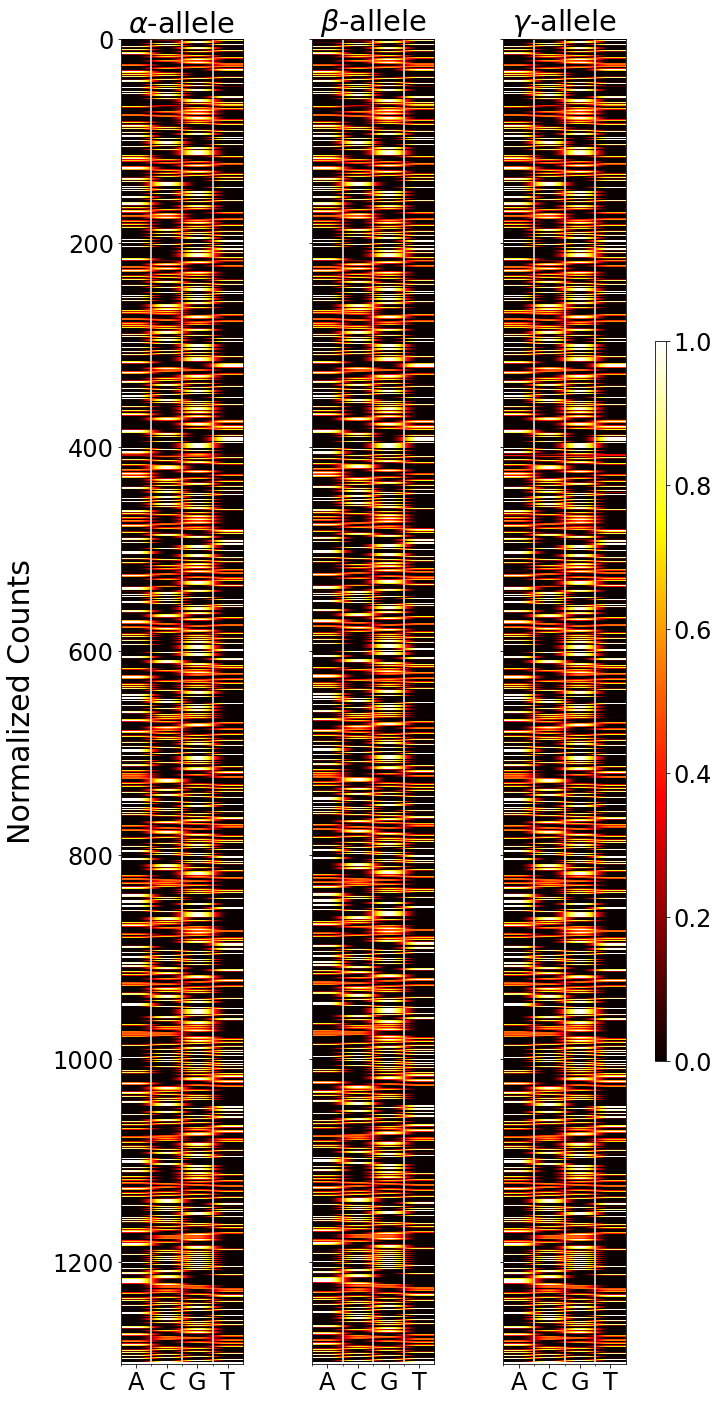

In [42]:
plt.rcParams.update(rcParams)

fig, ax = plt.subplots(1,3, figsize = (10,20), sharey = True)
vmax = 1
im1 = ax[0].imshow(df_normalized[[('Alpha','A'),('Alpha','C'),('Alpha','G'),('Alpha','T')]], cmap = 'hot', vmax = vmax)
ax[0].set_aspect(1/30)
ax[0].set_title(r'$\alpha$-allele')
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels(['A','C','G','T'])
ax[0].set_xticks(np.arange(-.5, 3.5, 1), minor=True)
ax[0].grid(which='minor', color='white', linestyle='-', linewidth=1.5)

im2 = ax[1].imshow(df_normalized[[('Beta','A'),('Beta','C'),('Beta','G'),('Beta','T')]], cmap = 'hot', vmax = vmax)
ax[1].set_aspect(1/30)
ax[1].set_title(r'$\beta$-allele')
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels(['A','C','G','T'])
ax[1].set_xticks(np.arange(-.5, 3.5, 1), minor=True)
ax[1].grid(which='minor', color='white', linestyle='-', linewidth=1.5)

im3 = ax[2].imshow(df_normalized[[('Gamma','A'),('Gamma','C'),('Gamma','G'),('Gamma','T')]], cmap = 'hot', vmax = vmax)
ax[2].set_aspect(1/30)
ax[2].set_title(r'$\gamma$-allele')
ax[2].set_xticks([0,1,2,3])
ax[2].set_xticklabels(['A','C','G','T'])
ax[2].set_xticks(np.arange(-.5, 3.5, 1), minor=True)
ax[2].grid(which='minor', color='white', linestyle='-', linewidth=1.5)

fig.text(0.0, 0.5, 'Normalized Counts', va='center', rotation='vertical', size = 30)

fig.tight_layout()

fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.9, 0.25, 0.015, 0.5])
cbar = fig.colorbar(im1, cbar_ax)


Alpha
Beta
Gamma


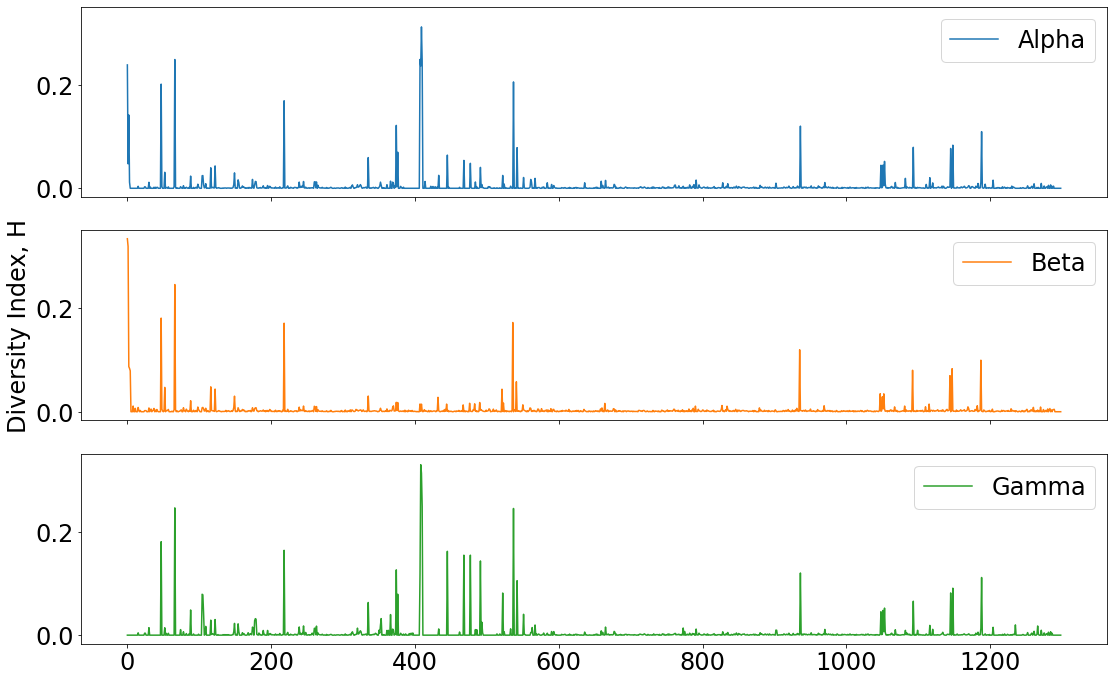

In [33]:
df_temp = pd.DataFrame()
nucleotides = ['A','C','G', 'T']
for allele in ['Alpha','Beta','Gamma']:
    print(allele)
    df_temp[allele] = np.zeros(1300)
    for i in range(len(nucleotides)):
        for j in range(i+1, len(nucleotides)):
            df_temp[allele] += (df_normalized[(allele,nucleotides[i])]*df_normalized[(allele,nucleotides[j])])
    
fig, ax = plt.subplots(3,1, figsize = (16,10), sharex = True, sharey = True)

df_temp[['Alpha']].plot(ax = ax[0], color = 'C0')
df_temp[['Beta']].plot(ax = ax[1], color = 'C1')
df_temp[['Gamma']].plot(ax = ax[2], color = 'C2')

ax[1].set_ylabel('Diversity Index, H')

fig.tight_layout()

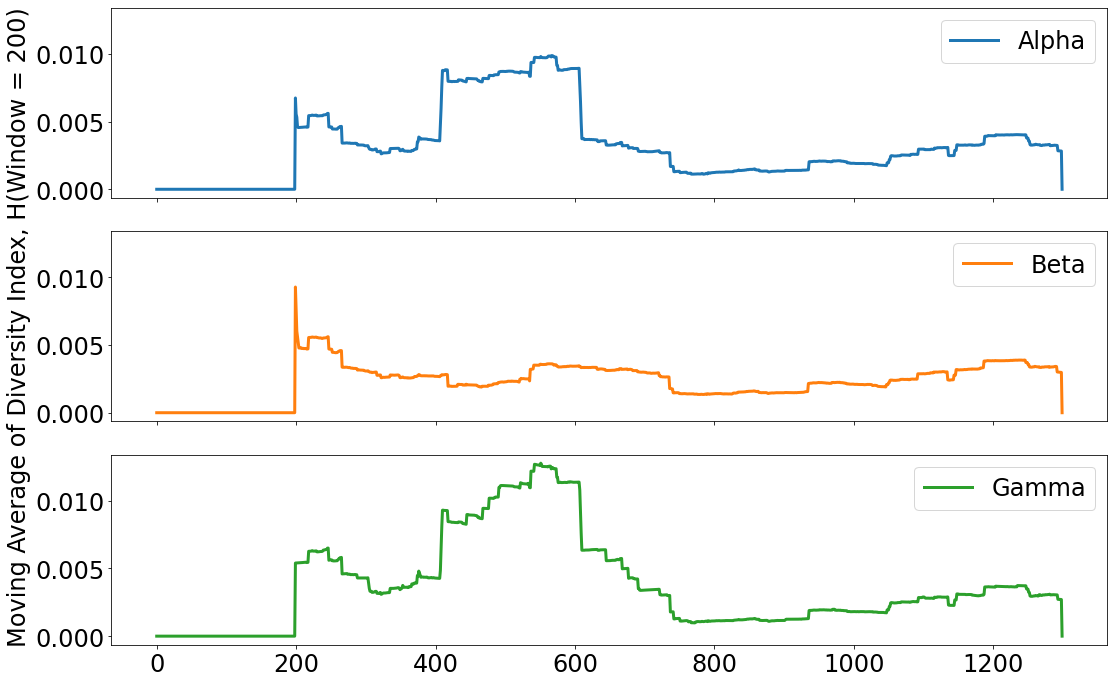

In [40]:
df_temp_mean = df_temp.rolling(window = 200).mean().fillna(0)
fig, ax = plt.subplots(3,1, figsize = (16,10), sharex = True, sharey = True)

df_temp_mean[['Alpha']].plot(ax = ax[0], color = 'C0', linewidth = 3)
df_temp_mean[['Beta']].plot(ax = ax[1], color = 'C1', linewidth = 3)
df_temp_mean[['Gamma']].plot(ax = ax[2], color = 'C2', linewidth = 3)

ax[1].set_ylabel('Moving Average of Diversity Index, H(Window = 200)')

fig.tight_layout()